In [32]:
import torch
from torch.utils.data import Dataset
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn.functional as F

In [33]:
### Import MNIST Dataset ###

target_transform = transforms.Compose([
    lambda x: torch.tensor(x),
    lambda x: F.one_hot(x,10)
])

training_data = datasets.MNIST(
    root="dataMNIST",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=target_transform
)

test_data = datasets.MNIST(
    root="dataMNIST",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=target_transform
)

In [34]:
print(len(training_data), len(test_data))

60000 10000


In [35]:
batch_size = 100

trainloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)


torch.Size([1, 28, 28])
tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])


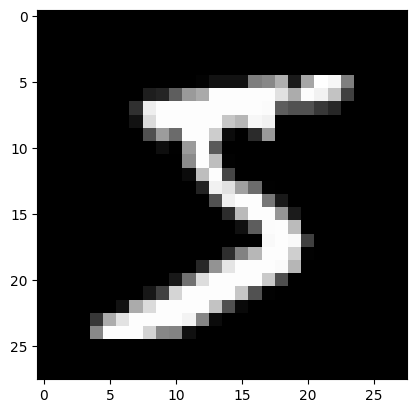

In [36]:
def imshow(img):
    plt.imshow(img.permute(1,2,0), cmap='gray')
    

img, label = training_data[0]

imshow(img)
print(img.shape)
print(label)

In [37]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.flat = nn.Flatten()
        
        self.lin1 = nn.Linear(784, 16)
        self.lin2 = nn.Linear(16, 16)
        self.lin3 = nn.Linear(16, 10)
        
        self.softmax = nn.Softmax(dim=0)
        
    def forward(self,X):
        X = self.flat(X)
        
        X = self.lin1(X)
        X = F.relu(X)
        
        X = self.lin2(X)
        X = F.relu(X)
        
        X = self.lin3(X)
        
        out = self.softmax(X)
        
        return out 

In [38]:
m = nn.Softmax(dim=0)
input = torch.randn(3)
output = m(input)
output

tensor([0.4603, 0.2175, 0.3222])

In [39]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

def train_model(train_dl,model, num_epochs=2):
    criterion = CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i,data in enumerate(train_dl):
            inputs, labels = data
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if i % 100 == 99:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
                running_loss = 0.0

In [40]:
model = Net()

train_model(trainloader, model)

[1,   100] loss: 0.229
[1,   200] loss: 0.224
[1,   300] loss: 0.222
[1,   400] loss: 0.222
[1,   500] loss: 0.222
[1,   600] loss: 0.222
[2,   100] loss: 0.222
[2,   200] loss: 0.222
[2,   300] loss: 0.222
[2,   400] loss: 0.222
[2,   500] loss: 0.222
[2,   600] loss: 0.222


In [41]:
torch.save(model.state_dict(), "mnist.pth")

In [46]:
model = Net()
model.load_state_dict(torch.load("mnist.pth"))
model.eval()

Net(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (lin1): Linear(in_features=784, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=16, bias=True)
  (lin3): Linear(in_features=16, out_features=10, bias=True)
  (softmax): Softmax(dim=0)
)

tensor([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],


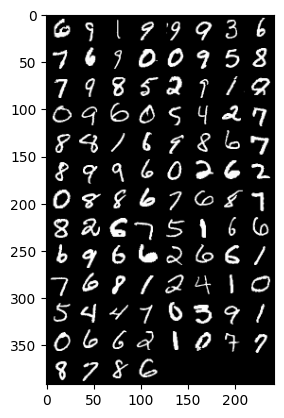

In [43]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(labels)

imshow(torchvision.utils.make_grid(images))

print('GroundTruth: ', ' '.join(f'{torch.argmax(labels[j])}' for j in range(4)))

In [44]:
outputs = model(images)

predicted = torch.argmax(outputs, dim=1)

print('Predicted: ', ' '.join(f'{predicted[j]}'
                              for j in range(4)))

TypeError: '_IncompatibleKeys' object is not callable

In [49]:
def accuracy_score(test_dl, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dl:
            inputs,labels = data
            
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)
            real = torch.argmax(labels, dim=1)
            
            total += labels.size(0)
            correct += (predictions == real).sum().item()
    return 100 * correct / total
            

In [50]:
accuracy = accuracy_score(testloader, model)
print(accuracy)

79.66
